emmmmmmmmmmm...............
原本是想写logistic回归，写着写着。。就写歪了。。。。写成了线性回归。。。
这相当于是第一篇博客，所以想着把很多东西都纳入进去，也方便自己回顾一些基础内容。、
写博客还是很耗时间的。。感觉自己想写的东西还远远没完，时间来不及，作业交了再说！

该文章参考了 线性模型系列博客 https://accepteddoge.com/cnblogs/regression-and-gradient-descent
和 Deep Learning 一书

### 什么是回归
目前我把它理解为：已知有输入 {$x_{1},x_{2},...,x_{n}$} 和线性函数 $f(x)$。根据函数 $f(x)$ 和输入 $X$ 可以得到输出 {$y_{1},y_{2},...,y_{n}$}。以上过程是已知输入和函数来得到相应的输出，现在我们的目标是通过输入 $X$ 和输出 $Y$ 来寻找和拟合 $f(x)$ 函数。

### 定义 $f(x)$
通常一个线性函数 $f(x)$ 可以写成 $f(x)$ = $a + bx + cx^{2} + dx^{3}+..$ 把它写成矩阵的形式就是 $f(x)$ = $WX + b$
从这个式子可知，一个线性函数由 $W$ 和 $b$ 这两个参数决定，不同的 $W$ 和不同的 $b$ 都会产生不同的线性函数。显然我们只要找到正确 $W$ 和 $b$ 就是找到了正确的 $f(x)$。

### 判断是否找到了正确的 $f(x)$
首先，我们不应该急于思考怎么找 $f(x)$ 而是先解决如何判断一个我们千方百计的找到的$f^{'}(x)$,就是正确的 $f(x)$ 的问题。
一个很显然的想法就是通过判断 输入 X 通过 $f^{‘}(x)$ 是否产生了与真实输出 $Y$ 一样的输出。于是把 $Y^{'}$ 与真实输出 $Y$ 的差异作为衡量 $f^{'}(x)$ 拟合 $f(x)$ 程度的标准。然后就是怎么量化两个数据间的差异，然后就出现了一个很常用的函数————均方误差，$\tfrac{1}{n}$$\sum_{n}(y_{i}-f(x_{i})^{'})^{2}$,这就是损失函数。

### 如何找正确的 $f(x)$
已知损失函数 $loss(w,b)$ $ = \tfrac{1}{n}$$\sum_{n}(y_{i}-
f(x_{i})^{'})^{2}$,$w$ 和 $b$ 是损失函数的参数，也是我们需要优化的参数。可以发现损失函数越小说明 $f^{'}(x)$ 越接近正确的 $f(x)$，那么我们的目标就是使损失函数最小，于是就出现了梯度下降方法。

在学习高数时，对一维函数 $g(x)$ 进行求导时，就是在 $y = g(x)$ 处画了条切线，切线的斜率就是导数，导数的正负表示这个 $g(x)$ 在点 $x$ 处是在增大还是减小。如果导数是正，我们只要减小 $x$ 就能减小 $y = g(x)$，反之，增大 $x$。总而言之，$x$的移动反向总是与梯度方向相反, $x^{new} = x^{old} - \tfrac{\Delta g(x))}{\Delta x^{old}}$,这就是梯度下降法，每次都通过移动 $x$ 达到函数下降，经过多次的迭代后可以达到一个好的效果。

现在回到对损失函数的讨论,在参数空间中任意的取一组参数 $(w^{'},b^{'})$,当然我们没有这个运气直接取到正确的 $(w,b)$，通常都会得到较坏的结果。然后把损失函数 $loss(w^{'},b^{'})$ 对 $w$ 和 $b$求偏导于是得到损失函数在(w^{'},b^{b})下对 $w$ 和 $b$ 两个方向的增减情况，现在我们的参数的二维的，于是我们能得到一个切平面,如果 $W$ 的维度不是一而是更高的，那么就是一个超平面。运用梯度下降思想，使 $w$ 每次都向使损失函数下降移动的方向 $w^{new} = w^{'} - \frac{\Delta loss(w,b))}{\Delta w^{'}}$,同理得到$b^{new} = b^{'} - \frac{\Delta loss(w,b))}{\Delta b^{'}}$。

### 往下降方向移动多少
现在我们已经有了一个似乎很好的方法来下降损失函数，下面考虑一个情况:
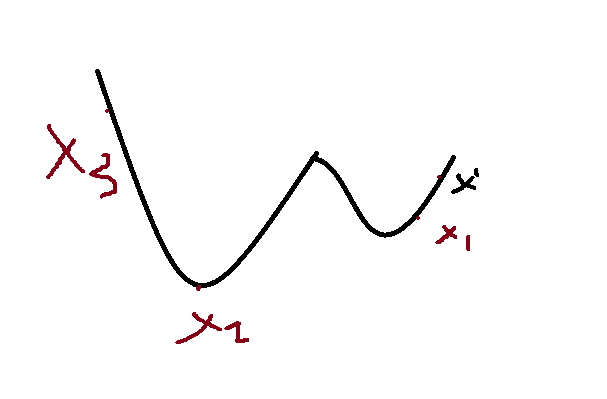

$x^{'}$ 是初始点，如果 $x$ 的移动距离只依赖于梯度的大小，$x^{'}$ 很可能就只移动到 $x_{1}$ ，$x_{1}$ 的梯度比 $x^{'}$ 的梯度小，移动的距离会更小，就算继续进行梯度下降，也无法到达最小值点 $x_{'}$，只能到达局部极小值点，梯度为0，损失不再减小。为了解决这个问题，不妨人为的设计一个参数来控制移动距离的大小，这就是学习率 $\eta$，用它来放大或缩小移动距离。于是梯度更新变成了 $x^{new} = x^{old} - \eta  \frac{\Delta g^{'}(x))}{\Delta x^{old}}$。
引入学习率 $\eta$ 后，又会产生一个问题， $\eta$ 应该多大，如果 $\eta$ 过大会导致 ${x^{'}}$ 移动到 ${x_{3}}$，然后 ${x_{3}}$ 又会移动到${x^{'}}$那边去，就这样两边旋转跳跃~所以如何设计一个好的学习率也是一个很重要的问题。

### 步长和梯度之间有什么关系呢
>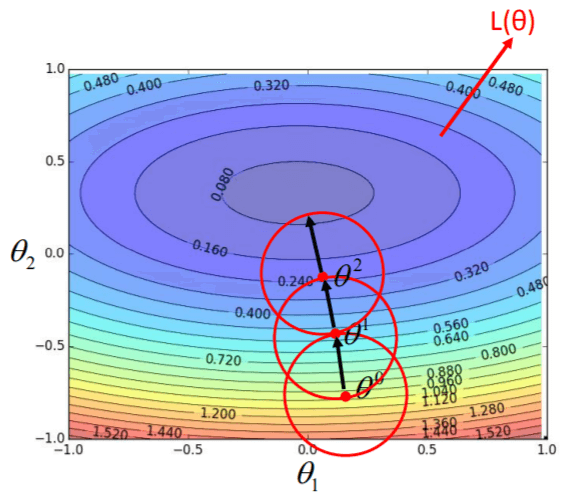


可以这么理解梯度下降法，如何所示，每次都在参数 $\theta$ 周围找到一个新的 $\theta$ 值使损失函数在这个周围内达到最小。那么如何在红色的圆圈中找到能令损失函数 $L(\theta)$ 达到最小值呢。

>对于任意在 $x = x_{0}$ 附近可微的函数 $h(x)$,函数可以写为:
$$ h(x) = \sum_{k = 0} \frac{h^{k}(x_{0})}{k!}(x - x_{0})^{k}$$
$$ = h(x_{0}) + h^{'}(x_{0})(x-x_{0}) + \frac{h^{''}(x_{0})}{2!}(x - x_{0})^{2} + ..$$
当 $x$ 很接近 $x_{0}$ 时，会发现一次微分项会远大于后面的高次项，因此有
$$h(x) \approx h(x_{0}) + h^{'}(x_{0})(x-x_{0})$$
此时优化目标变成 $min h(x) = min(h(x_{0} + h^{'}(x_{0})(x-x_{0}))$

>如果推广到多元的情况下，假设现在是两个参数 $x$ 和 $y$，把 $h(x,y)$ 在 $(x_{0},y_{0})$ 上泰勒公式展开，并且 $(x,y)$ 取在很接近 $(x_{0},y_{0})$ 的情况下，省略一次项后面的式子:
$$h(x,y) = h(x_{0},y_{0}) + \frac{\delta h(x_{0},y_{0})}{\delta x_{0}}(x - x_{0}) + 
\frac{\delta h(x_{0},y_{0})}{\delta y_{0}}(y - y_{0})$$
如果以中心的 $(x_{0},y_{0})$ 画一个很小半径为 $r$ 的圆圈，把 $(x,y)$ 的取值限定在这个圈里，同时把损失函数简化为:
    $$L(x,y) = s + u(x - x_{0}) + v(y - y_{0})$$
其中 $s$ 表示原本的损失函数值 $L(x_{0},y_{0})$, $u = \frac{\delta h(x_{0},y_{0})}{\delta x_{0}}$表示 $x$ 方向上的梯度，$v = \frac{\delta h(x_{0},y_{0})}{\delta y_{0}}$ 表示 $y$ 方向上的梯度


令 $x - x_{0} = \Delta x$ 和 $y - y_{0} = \Delta y$，则 
$$u(x - x_{0}) + v(y - y_{0}) = u \Delta x + v \Delta y$$
相当于是向量 $(u,v)$ 与向量 $(\Delta x,\Delta y)$ 的内积。现在来考虑向量 $(\Delta x,\Delta y)$,它被限定在 $(x_{0},y_{0})$ 周围一个半径为 $r$ 的圆内，为使损失函数 $L(x,y) = s + u \Delta x + v \Delta y$ 在院内取到最小值，也就是 $u \Delta x + v \Delta y$ 的符号应该为$-$，且数值上应该为最大。
已知向量 $(u,v)$ 是损失函数 $L(x,y)$ 在起始点 $(x_{0},y_{0})$ 的梯度，由初始点决定，是固定的。为损失函数达到范围内的最小值，向量 $(\Delta x,\Delta y)$ 的方向应该与向量 $(u,v)$ 的方向相反，并且长度应该为 $r$。

不妨设 $(\Delta x,\Delta y)$ = $-\alpha(x_{0},y_{0})$，则 $a^{2}(\Delta^{2} x +\Delta^{2} y) = d^{2}$,则 $\alpha = \frac{d}{\sqrt {\Delta^{2} x +\Delta^{2} y}}$。

如果了步长 $r$，$(\Delta x,\Delta y)$ 的系数 $\alpha$ 应该与当前位置的梯度存在这样的一个关系。
但在实际运用中，是通过引入学习率 $\eta$ 对参数更新进行限定，我们可以看到权重更新公式是 $w^{new}$ = $w^{old}$ - $\eta \Delta W$。

### 鞍点和局部极小值点
相信大家都听过局部极小值点，但对鞍点可能不够的熟悉，在 Deep Learning 书中对局部极小值和鞍点问题有很好的解释，下面谈谈他们。
什么是鞍点？在损失函数高峰上，利用梯度下降法不断的向下攀爬，如果有一个点，沿着某一个维度方向移动导致损失上升，而沿着另一个维度方向移动能减小损失，这个点既不是局部极小值也不是局部极大值，这样的点就是鞍点。

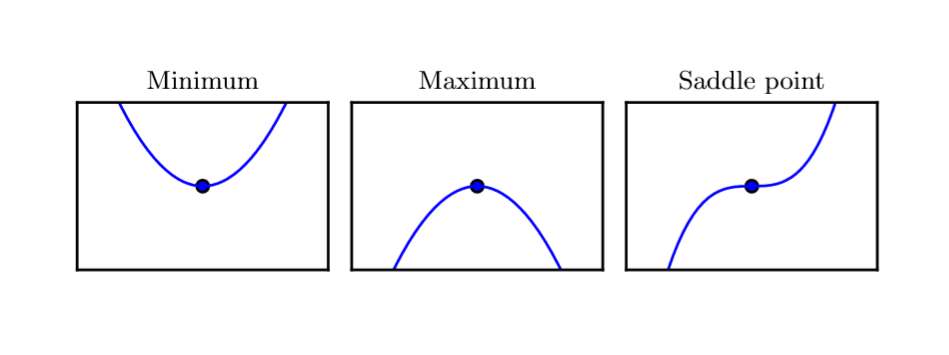


可以发现在鞍点附近既存在比它大的点又存在比它小的点，而局部极小值点则是周围最小的点，由此能发现，局部极小值是优于鞍点的。
>在低维的参数空间，局部极小值点会很常见，而在高纬的参数空间，则是鞍点很常见。可以在直接上理解一下，Hessian 矩阵在局部极小值点处只有正特征值而在鞍点却有正负特征值。假设通过抛硬币的方式来决定每个特征值的正负号。在一位情况下，很容易就能得到特征值为正，但是在 n-维空间下，想得到特征值都为正的概率是十分低的。
        很多随机函数的一个惊人的性质是，当我们到达代价较低的区间时，Hessian 矩阵的特征值为正的可能性更大。和抛硬币类比，这意味着如果我们处于低代价的临界点时，抛硬币正面朝上 n 次的概率更大。这意味着局部极小值点具有低代价的可能性比具有高代价要大的多。具有高代价的更有可能是鞍点，具有极高代价的临界点可能就是局部极大值了。

### 从回到大分类